In [443]:
import numpy as np
import pandas as pd

df=pd.read_csv("C:\Study Material\Minor\STOCK-PREDICTION-USING-SVM-REGRESSION-master/AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,07-08-08,23.244286,23.735714,23.071428,23.367144,15.648111,168093100
1,08-08-08,23.408571,24.235714,23.392857,24.221428,16.220194,178499300
2,11-08-08,24.295713,25.214285,24.238571,24.794285,16.603811,222826100
3,12-08-08,24.788572,25.612858,24.787144,25.247143,16.907074,209069700
4,13-08-08,25.425714,25.714285,25.128571,25.614286,17.152937,210586600


In [444]:
X=df.iloc[:,[1,2,3,6]]
X

,Open,High,Low,Volume
0,23.244286,23.735714,23.071428,168093100
1,23.408571,24.235714,23.392857,178499300
2,24.295713,25.214285,24.238571,222826100
3,24.788572,25.612858,24.787144,209069700
4,25.425714,25.714285,25.128571,210586600
5,25.475714,25.778572,25.405714,177825200
6,25.577143,25.678572,25.007143,177062900
7,25.081429,25.401428,24.831429,138003600
8,24.934286,25.295713,24.544285,154051100
9,24.967142,25.277143,24.801428,126737800


In [445]:
y=df.iloc[:,4]
y

0        23.367144
1        24.221428
2        24.794285
3        25.247143
4        25.614286
5        25.617144
6        25.105715
7        25.055714
8        24.790001
9        25.120001
10       24.898571
11       25.255714
12       24.650000
13       24.805714
14       24.952858
15       24.820000
16       24.218571
17       23.741428
18       23.851429
19       23.031429
20       22.882856
21       22.559999
22       21.668571
23       21.658571
24       21.807142
25       21.277143
26       20.051428
27       19.982857
28       18.261429
29       19.155714
           ...    
1900     96.760002
1901     96.910004
1902     96.690002
1903    100.529999
1904    100.750000
1905    101.500000
1906    103.010002
1907    101.870003
1908    101.029999
1909    101.120003
1910    101.169998
1911    102.260002
1912    102.519997
1913    104.580002
1914    105.970001
1915    105.800003
1916    105.919998
1917    105.910004
1918    106.720001
1919    106.129997
1920    105.669998
1921    105.

In [446]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10 )
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,criterion='mse')
rf.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [447]:

import numpy as np
u=rf.predict(X_test)
print('MAPE is :',np.mean(np.abs((y_test - u) / y_test)) * 100)

MAPE is : 16.81203832718227


In [448]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10 )
from sklearn.ensemble import RandomForestRegressor
m1=100
m2=100
opt_depth=0
for i in range(1, 15):
    rf=RandomForestRegressor(max_depth=i,criterion='mse')
    rf.fit(X_train,y_train)

    y_test_pred=rf.predict(X_test)

    from sklearn import metrics
    mse_test = metrics.mean_squared_error(y_test,y_test_pred)
    rmse_test= np.sqrt(mse_test)
    print("Score (test MSE): {}".format(mse_test))
    print("Score (test RMSE): {}".format(rmse_test))
    
    y_train_pred=rf.predict(X_train)

    from sklearn import metrics
    mse_train = metrics.mean_squared_error(y_train,y_train_pred)
    rmse_train= np.sqrt(mse_train)
    print("Score (train MSE): {}".format(mse_train))
    print("Score (test RMSE): {}".format(rmse_train))
    if(mse_train<m2 and mse_test<m1):
        opt_depth=i
        m1=mse_test
        m2=mse_train
    
    print("RF with full trees, Train MSE: {} Test MSE: {}".format(mse_train, mse_test))
    print("\n")
print("Optimal depth with optimal no. of trees", opt_depth)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Score (test MSE): 319.53181462783516
Score (test RMSE): 17.875452850986324
Score (train MSE): 301.1817103649055
Score (test RMSE): 17.354587588442012
RF with full trees, Train MSE: 301.1817103649055 Test MSE: 319.53181462783516


Score (test MSE): 64.75448432932404
Score (test RMSE): 8.04701710755756
Score (train MSE): 65.24770952919064
Score (test RMSE): 8.077605432873696
RF with full trees, Train MSE: 65.24770952919064 Test MSE: 64.75448432932404


Score (test MSE): 14.579071488730898
Score (test RMSE): 3.8182550319132558
Score (train MSE): 14.504680852366173
Score (test RMSE): 3.8085011293639095
RF with full trees, Train MSE: 14.504680852366173 Test MSE: 14.579071488730898


Score (test MSE): 2.8673819621610317
Score (test RMSE): 1.693334568879119
Score (train MSE): 2.652092615569579
Score (test RMSE): 1.6285246745350772
RF with full trees, Train MSE: 2.652092615569579 Test MSE: 2.8673819621610317


Score (test MSE): 0.8099278637447975
Score (test RMSE): 0.8999599234103691
Score (tr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [449]:
m3=100
m4=100
opt_n_estimators=0
for j in range(10, 1000, 100):
    rf=RandomForestRegressor(max_depth=2,criterion='mse',n_estimators=j)
    rf.fit(X_train,y_train)

    y_test_pred=rf.predict(X_test)

    from sklearn import metrics
    mse_test = metrics.mean_squared_error(y_test,y_test_pred)
    rmse_test= np.sqrt(mse_test)
    print("Score (test MSE): {}".format(mse_test))
    print("Score (test RMSE): {}".format(rmse_test))  
    
    y_train_pred=rf.predict(X_train)

    from sklearn import metrics
    mse_train = metrics.mean_squared_error(y_train,y_train_pred)
    rmse_train= np.sqrt(mse_train)
    print("Score (train MSE): {}".format(mse_train))
    print("Score (test RMSE): {}".format(rmse_train))
    if(mse_train<m4 and mse_test<m3):
        opt_n_estimators=j
        m3=mse_test
        m4=mse_train
    
    print("RF with full trees, Train MSE: {} Test MSE: {}".format(mse_train, mse_test))
    print("\n")
print("Optimal no. of trees:", opt_n_estimators)


Score (test MSE): 64.46887510628265
Score (test RMSE): 8.029251217036533
Score (train MSE): 67.5580682965954
Score (test RMSE): 8.219371526862343
RF with full trees, Train MSE: 67.5580682965954 Test MSE: 64.46887510628265


Score (test MSE): 64.65257745963659
Score (test RMSE): 8.040682648857409
Score (train MSE): 67.46088929073899
Score (test RMSE): 8.213457815727734
RF with full trees, Train MSE: 67.46088929073899 Test MSE: 64.65257745963659


Score (test MSE): 64.82522117399654
Score (test RMSE): 8.051411129360899
Score (train MSE): 67.2632738359247
Score (test RMSE): 8.201419013556416
RF with full trees, Train MSE: 67.2632738359247 Test MSE: 64.82522117399654


Score (test MSE): 65.42147924285473
Score (test RMSE): 8.088354544828926
Score (train MSE): 67.63149490451747
Score (test RMSE): 8.223836994038578
RF with full trees, Train MSE: 67.63149490451747 Test MSE: 65.42147924285473


Score (test MSE): 65.0283793853173
Score (test RMSE): 8.064017570995073
Score (train MSE): 67.453797

In [450]:
y_test_pred=rf.predict(X_test)
rmse_test = np.sqrt(mse_test)
print("Score (test RMSE): {}".format(np.sqrt(mse_test)))


y_train_pred=rf.predict(X_train)
rmse_train = np.sqrt(mse_train)
print("Score (train RMSE): {}".format(np.sqrt(mse_train)))

Score (test RMSE): 8.06003116231174
Score (train RMSE): 8.205256233671161


In [451]:
u.shape

(579,)

In [452]:
N=df.iloc[:,[1,2,3,4,5,6]]
N

,Open,High,Low,Close,Adj Close,Volume
0,23.244286,23.735714,23.071428,23.367144,15.648111,168093100
1,23.408571,24.235714,23.392857,24.221428,16.220194,178499300
2,24.295713,25.214285,24.238571,24.794285,16.603811,222826100
3,24.788572,25.612858,24.787144,25.247143,16.907074,209069700
4,25.425714,25.714285,25.128571,25.614286,17.152937,210586600
5,25.475714,25.778572,25.405714,25.617144,17.154850,177825200
6,25.577143,25.678572,25.007143,25.105715,16.812365,177062900
7,25.081429,25.401428,24.831429,25.055714,16.778877,138003600
8,24.934286,25.295713,24.544285,24.790001,16.600939,154051100
9,24.967142,25.277143,24.801428,25.120001,16.821934,126737800


In [453]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix,classification_report
kmeans= KMeans(n_clusters=6)
kmeans.fit(N)
labels= kmeans.predict(N)
centroids=kmeans.cluster_centers_
print(centroids.shape)
centroids




(6, 6)


array([[9.72525551e+01, 9.80359455e+01, 9.64483082e+01, 9.72777495e+01,
        8.80665924e+01, 5.10416019e+07],
       [1.85395239e+01, 1.92190044e+01, 1.76445454e+01, 1.84406061e+01,
        1.23489880e+01, 4.58114173e+08],
       [5.06659561e+01, 5.12685484e+01, 5.00097003e+01, 5.06699730e+01,
        3.55363036e+01, 1.43106148e+08],
       [3.44386201e+01, 3.49883604e+01, 3.33848051e+01, 3.41562499e+01,
        2.32925464e+01, 2.89000791e+08],
       [4.28985432e+01, 4.34622277e+01, 4.21276166e+01, 4.27538260e+01,
        2.95116754e+01, 2.00857671e+08],
       [5.79328946e+01, 5.84382744e+01, 5.73755670e+01, 5.78971358e+01,
        4.34429607e+01, 9.63585642e+07]])

In [454]:
c= ((centroids[0][0]+centroids[1][0]+centroids[2][0]+centroids[3][0]+centroids[4][0]+centroids[5][0])/6)
c

50.28801549095482

In [455]:
 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

cutoff = c                             # decide on a cutoff limit
u_classes = np.zeros_like(u)    # initialise a matrix full with zeros
u_classes[u > cutoff] = 1

y_test_classes = np.zeros_like(u)
y_test_classes[y_test > cutoff] = 1

confusion_matrix(y_test_classes,u_classes)
results = confusion_matrix(y_test_classes, u_classes)
print(results)
                          



[[152  55]
 [  0 372]]


In [456]:
#u_classes = np.zeros_like(u)    # initialise a matrix full with zeros
#u_classes[u > cutoff] = 1
#y_test_classes = np.zeros_like(u)
#y_test_classes[y_test > cutoff] = 1
#print (accuracy_score(y_test_classes, u_classes))


In [457]:
u_classes = np.zeros_like(u)    # initialise a matrix full with zeros
u_classes[u > cutoff] = 1
y_test_classes = np.zeros_like(u)
y_test_classes[y_test > cutoff] = 1

print (classification_report(y_test_classes, u_classes))

              precision    recall  f1-score   support

         0.0       1.00      0.73      0.85       207
         1.0       0.87      1.00      0.93       372

    accuracy                           0.91       579
   macro avg       0.94      0.87      0.89       579
weighted avg       0.92      0.91      0.90       579



In [458]:
m5=0
opt1_depth=0

for i in range(1, 11):
    rf=RandomForestRegressor(max_depth=i,criterion='mse')
    rf.fit(X_train,y_train)
    u=rf.predict(X_test)
    u_classes = np.zeros_like(u)    # initialise a matrix full with zeros
    u_classes[u > cutoff] = 1
    y_test_classes = np.zeros_like(u)
    y_test_classes[y_test > cutoff] = 1
    var = (accuracy_score(y_test_classes, u_classes))
    print("accuracy_score:", var)
     
    
    if(var>m5):
        opt1_depth=i
        m5=var
       
    
    print("\n")
print("Optimal_depth:", opt1_depth)

accuracy_score: 0.846286701208981


accuracy_score: 0.9050086355785838


accuracy_score: 0.9758203799654577


accuracy_score: 0.9775474956822107


accuracy_score: 0.9965457685664939


accuracy_score: 0.9965457685664939


accuracy_score: 0.998272884283247


accuracy_score: 0.998272884283247


accuracy_score: 0.998272884283247


accuracy_score: 1.0


Optimal_depth: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [459]:
m6=0
opt_n_estimators=0
for j in range(10, 1000, 100):
    rf=RandomForestRegressor(max_depth=2,criterion='mse',n_estimators=j)
    rf.fit(X_train,y_train)

    u=rf.predict(X_test)
    u_classes = np.zeros_like(u)    # initialise a matrix full with zeros
    u_classes[u > cutoff] = 1
    y_test_classes = np.zeros_like(u)
    y_test_classes[y_test > cutoff] = 1
    var = (accuracy_score(y_test_classes, u_classes))
    print("accuracy_score:", var)
     
    
    if(var>m6):
        opt_n_estimators=j
        m6=var
       
    
    print("\n")
print("Optimal Number of N_estimators:", opt_n_estimators)

accuracy_score: 0.9050086355785838


accuracy_score: 0.9050086355785838


accuracy_score: 0.9050086355785838


accuracy_score: 0.9050086355785838


accuracy_score: 0.9050086355785838


accuracy_score: 0.9050086355785838


accuracy_score: 0.9050086355785838


accuracy_score: 0.9050086355785838


accuracy_score: 0.9050086355785838


accuracy_score: 0.9050086355785838


Optimal Number of N_estimators: 10


In [570]:
u

array([ 54.37093824,  54.3417713 , 114.81367436,  82.5761479 ,
       114.81367436,  54.40166313,  24.90399741,  54.31347264,
        24.90399741,  82.5761479 ,  54.67120619,  82.5761479 ,
        54.31347264,  31.36640533,  82.5761479 ,  82.5761479 ,
        24.90399741,  54.31347264,  24.90399741,  24.90399741,
       114.81367436, 114.81367436,  24.90399741,  24.90399741,
       114.81367436,  82.5761479 ,  24.90399741, 114.81367436,
        24.90399741, 114.81367436,  24.90399741, 114.81367436,
       104.74440626,  82.5761479 ,  24.90399741,  82.67840597,
        82.51074477,  82.5761479 ,  24.90399741,  82.64403891,
        57.48146865,  54.31347264,  24.90399741, 114.81367436,
        58.34814657,  24.90399741,  54.31347264,  24.90399741,
        54.31347264,  54.67120619,  54.31347264,  24.90399741,
        24.90399741,  24.90399741, 114.81367436,  54.31347264,
        54.37093824,  82.5761479 ,  82.64403891,  54.31347264,
        54.31347264, 114.81367436, 114.81367436,  24.90

In [583]:
m=u[0:9]
p=u[0:29]
m


array([ 54.37093824,  54.3417713 , 114.81367436,  82.5761479 ,
       114.81367436,  54.40166313,  24.90399741,  54.31347264,
        24.90399741])

In [584]:
from numpy import array

In [585]:
df=pd.read_csv("C:\Study Material\Minor\STOCK-PREDICTION-USING-SVM-REGRESSION-master/aapl_n.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,08-04-16,108.910004,109.769997,108.169998,52.66,103.624672,23581700
1,11-04-16,108.970001,110.610001,108.830002,58.44,103.967987,29407500
2,12-04-16,109.339996,110.500000,108.660004,116.22,105.322182,27232300
3,13-04-16,110.800003,112.339996,110.800003,90.55,106.848053,33257300
4,14-04-16,111.620003,112.389999,111.330002,120.66,106.905258,25473900


In [586]:
xnew=df.iloc[:,4]

In [587]:
xnew2=xnew[0:9]
o=xnew[0:29]
xnew2

0     52.66
1     58.44
2    116.22
3     90.55
4    120.66
5     62.88
6     25.23
7     60.76
8     28.45
Name: Close, dtype: float64

In [588]:
avg_error=0

In [589]:
for i in range(1, 10):
    error=u[i]-xnew[i]
    avg_error=avg_error+error

In [590]:
avg_error/10

-3.399545359358831

In [591]:
print('MAPE is :',np.mean(np.abs((xnew2 - m) / xnew2)) * 100)

MAPE is : 6.996932201634712


In [592]:
from sklearn import metrics
mse_test = metrics.mean_squared_error(xnew2,m)
rmse_test= np.sqrt(mse_test)
print("Score (test MSE): {}".format(mse_test))
print("Score (test RMSE): {}".format(rmse_test))

Score (test MSE): 27.28696710182676
Score (test RMSE): 5.223692860594578


In [593]:
import numpy as geek 
  
prediction= geek.array(m) 
original= geek.array(xnew2) 
   
print ("prediction : ", prediction) 
print ("original : ", original) 

    
error = geek.subtract(prediction, original)  
print ("error: ", error)

prediction :  [ 54.37093824  54.3417713  114.81367436  82.5761479  114.81367436
  54.40166313  24.90399741  54.31347264  24.90399741]
original :  [ 52.66  58.44 116.22  90.55 120.66  62.88  25.23  60.76  28.45]
error:  [ 1.71093824 -4.0982287  -1.40632564 -7.9738521  -5.84632564 -8.47833687
 -0.32600259 -6.44652736 -3.54600259]


Text(0.5, 1.0, 'Prediction vs Real')

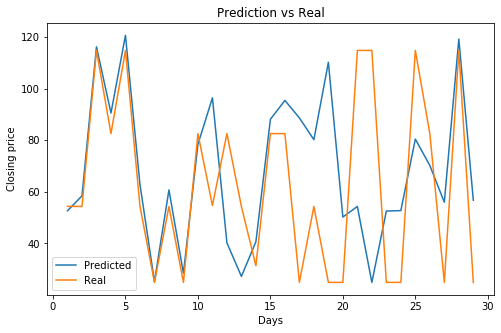

In [598]:
import pandas as pd
import matplotlib.pyplot as plt
x=o
y=p
m=np.arange(1,30,1)
fig,ax=plt.subplots(figsize=(8,5))
plt.plot(m,x,label='Predicted')
plt.plot(m,y,label='Real')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Closing price")
plt.title("Prediction vs Real")